In [31]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np
from sklearn.preprocessing import StandardScaler

<AxesSubplot:xlabel='X', ylabel='Y'>

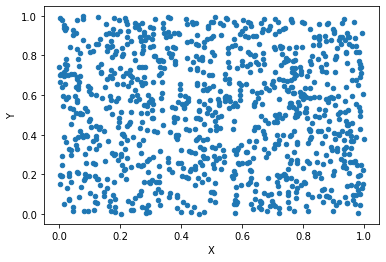

In [32]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [33]:
df=pd.read_excel("C://Users//HP//Desktop//Book1.xlsx")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [35]:
df1=df.drop(["ID#"],axis=1)

In [36]:
df1_norm=StandardScaler().fit_transform(df1)

In [37]:
#for deciding k value using elbow graph
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)

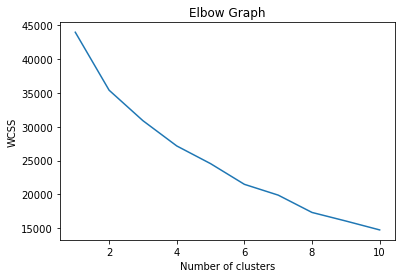

In [38]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [39]:
clusters4=KMeans(4,random_state=25).fit(df1_norm)
clusters4

KMeans(n_clusters=4, random_state=25)

In [40]:
clusters4.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [41]:
df4=df1.copy()
df4['c4']=clusters4.labels_
df4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c4
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [42]:
clusters4.cluster_centers_

array([[ 4.26155661e-01, -8.81978700e-03,  1.20325904e+00,
        -8.21270368e-02, -5.46420414e-02,  9.23229513e-01,
         7.50770969e-01, -9.21611853e-02, -1.02476072e-01,
         3.71942257e-01,  5.73130952e-01],
       [ 1.16774007e+00,  1.02758112e+00,  8.76832606e-02,
         1.38046790e-01, -6.27665798e-02,  5.80073471e-01,
         1.55085819e+00,  3.43518798e+00,  3.68477621e+00,
         2.71078190e-01,  9.06606321e-01],
       [-2.93151458e-01, -6.44279528e-02, -6.06712048e-01,
         3.18666303e-02, -6.07585354e-02, -5.14174999e-01,
        -4.85765977e-01, -1.86254986e-01, -1.98139793e-01,
        -2.03544776e-01, -3.46419964e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [43]:
df4.groupby('c4').agg(['mean']).reset_index()

,c4,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116544.167987,138.345483,3.713946,1.002377,1.001585,39415.042789,18.812203,331.794770,0.988906,4886.392235,0.647385
1,1,191266.395349,939.017442,2.180233,1.034884,1.000000,31152.430233,26.494186,5269.436047,15.348837,4678.302326,0.808140
2,2,44033.030588,93.736863,1.224314,1.019216,1.000392,4726.792157,6.932157,198.860784,0.620000,3697.888627,0.202745
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


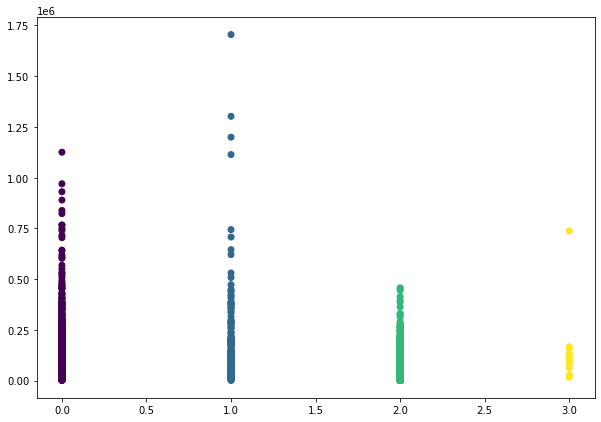

In [44]:
plt.figure(figsize=(10, 7))  
plt.scatter(df4['c4'],df4['Balance'], c=clusters4.labels_) 

In [45]:
clusters5=KMeans(5,random_state=30).fit(df1_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [46]:
clusters5.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [47]:
df5=df1.copy()
df5['c5']=clusters5.labels_
df5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c5
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [48]:
clusters5.cluster_centers_

array([[-2.97441370e-01, -6.26013958e-02, -6.09944285e-01,
        -9.82418871e-02, -6.07159307e-02, -5.21330789e-01,
        -5.01454441e-01, -1.87180704e-01, -1.99831577e-01,
        -2.10475283e-01, -3.52420208e-01],
       [ 1.14970340e+00,  1.06407580e+00,  1.02900923e-01,
        -9.82418871e-02, -6.27665798e-02,  5.78252911e-01,
         1.52034538e+00,  3.44900129e+00,  3.66768718e+00,
         2.64756357e-01,  8.99553448e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 4.24748143e-01, -1.21396375e-02,  1.19282031e+00,
        -9.82418871e-02, -5.47249449e-02,  9.11488076e-01,
         7.40508649e-01, -9.38523027e-02, -1.02849450e-01,
         3.77190968e-01,  5.65958814e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [49]:
df5.groupby('c5').agg(['mean']).reset_index()

,c5,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43669.876000,95.611600,1.221200,1.000000,1.000400,4568.151200,6.791600,197.838000,0.615200,3684.750400,0.200000
1,1,189448.964497,967.248521,2.201183,1.000000,1.000000,31108.467456,26.201183,5288.775148,15.284024,4665.248521,0.804734
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,116436.737421,134.935535,3.702830,1.000000,1.001572,39185.495283,18.721698,329.176101,0.985063,4897.754717,0.644654
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


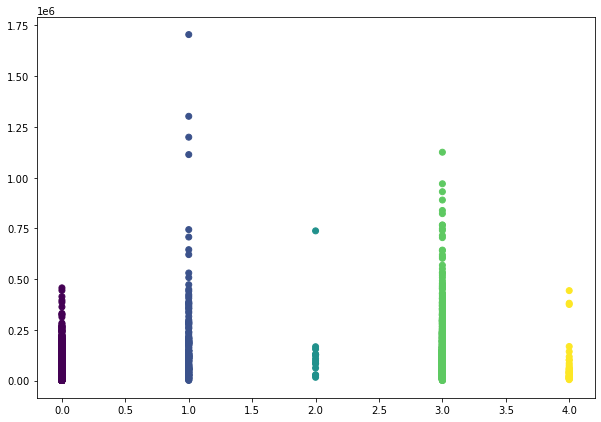

In [50]:
plt.figure(figsize=(10, 7))  
plt.scatter(df5['c5'],df5['Balance'], c=clusters5.labels_) 